# Contents
[View the Data](#view_data)<br>
[Vizualize the Data](#visualize_data)<br>
[Correlation Analysis and Feature Selection](#correlation_analysis)<br>
[Filtered Correlation Matrix](#filtered_correlation)<br>
[Simple Linear Regression](#simple_linear_regression)<br>
[RANdom SAmple Consensus (RANSAC)](#ransac)<br>
[Evaluate the accuracy of a Regression Model](#evaluation)<br>
<br>
<br>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.datasets import load_boston

In [2]:
boston = load_boston()

<div id="view_data">
    <h1>View the Data</h1>
</div>

In [3]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
df = pd.DataFrame(boston.data, columns=boston.feature_names)

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
df['MEDV'] = boston.target

In [7]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
CRIM       506 non-null float64
ZN         506 non-null float64
INDUS      506 non-null float64
CHAS       506 non-null float64
NOX        506 non-null float64
RM         506 non-null float64
AGE        506 non-null float64
DIS        506 non-null float64
RAD        506 non-null float64
TAX        506 non-null float64
PTRATIO    506 non-null float64
B          506 non-null float64
LSTAT      506 non-null float64
MEDV       506 non-null float64
dtypes: float64(14)
memory usage: 55.5 KB


In [9]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


<div id="visualize_data">
    <h1>Vizualize the Data</h1>
</div>

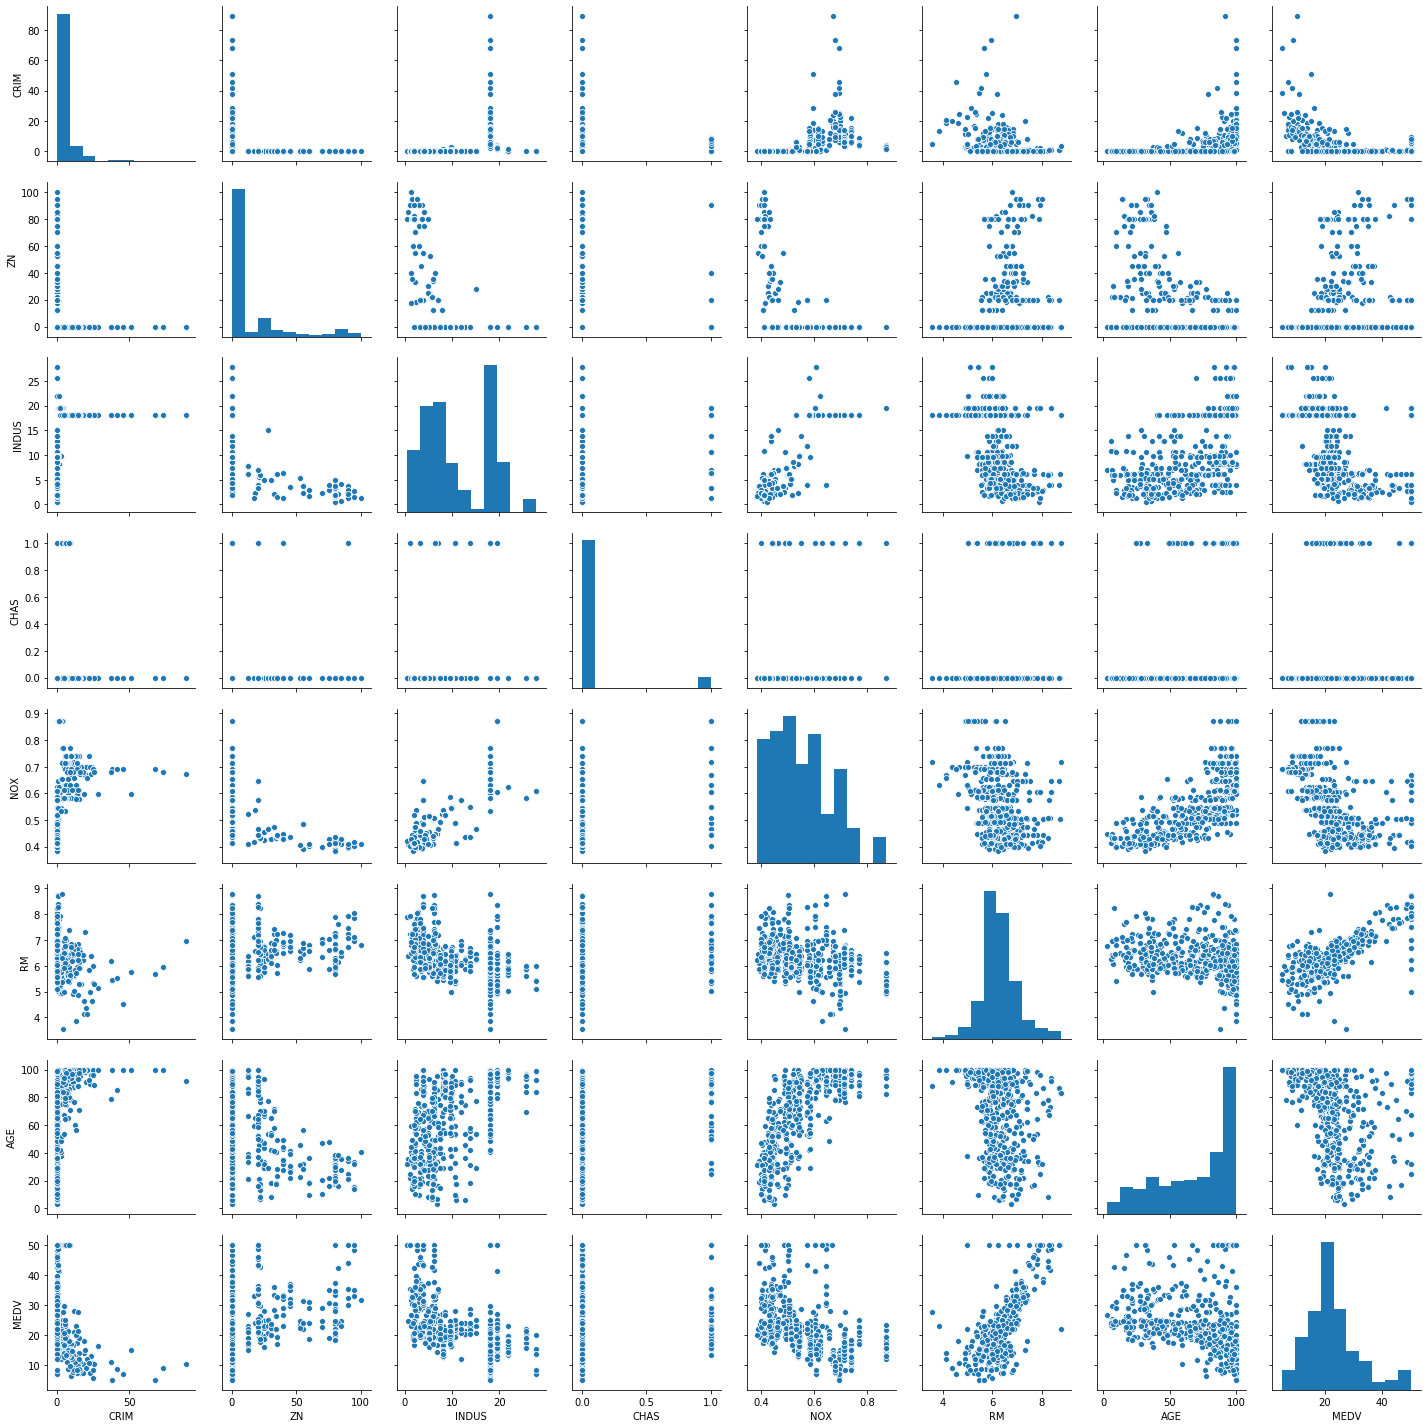

In [10]:
sns.pairplot(df.iloc[:,list(range(0,7))+[-1]])
plt.show()

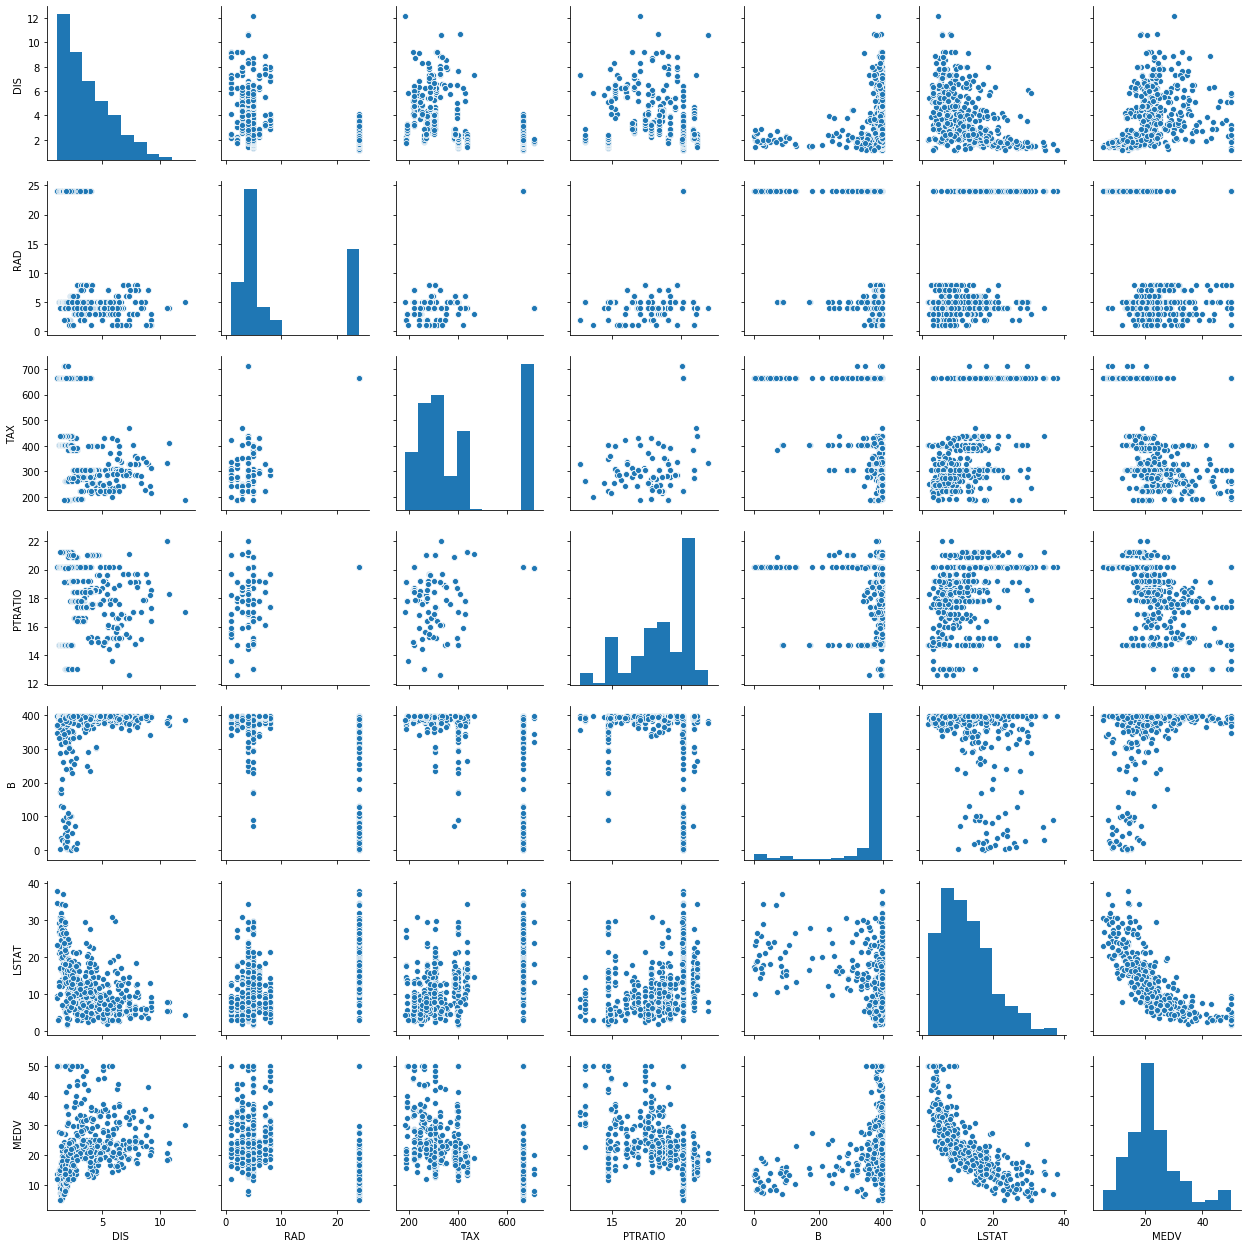

In [11]:
sns.pairplot(df.iloc[:,7:])
plt.show()

In [12]:
col_study = ['ZN', 'INDUS', 'RM', 'LSTAT']

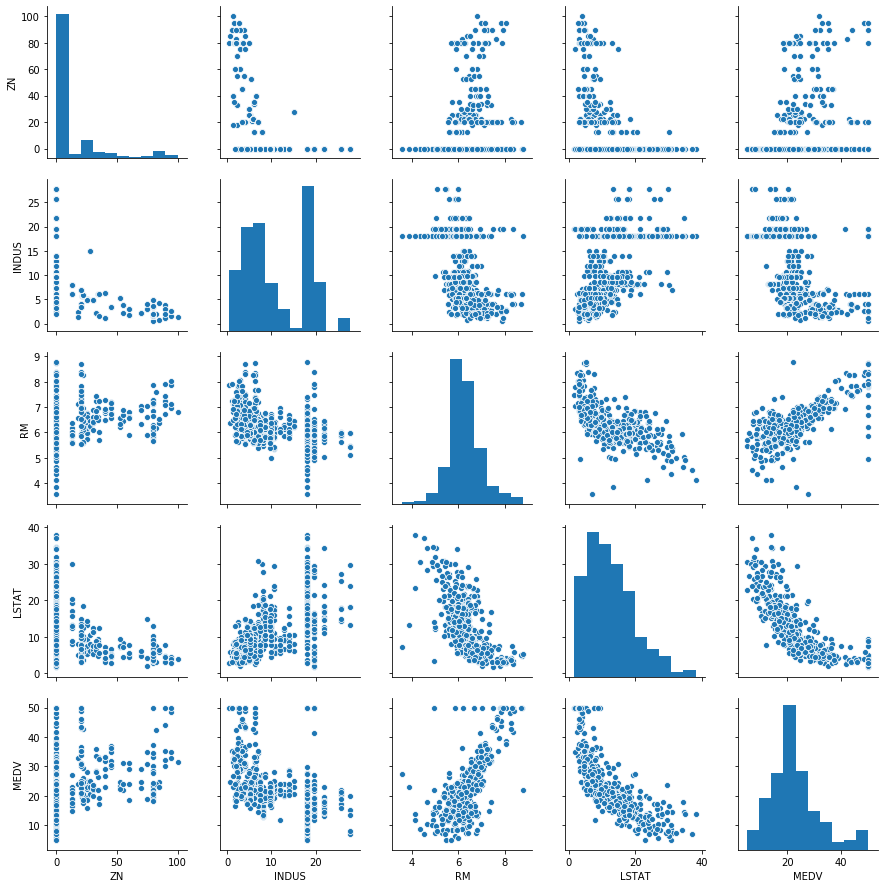

In [13]:
sns.pairplot(df.loc[:, col_study + ['MEDV']])
plt.show()

<div id="correlation_analysis">
    <h1>Correlation Analysis and Feature Selection</h1>
</div>

In [14]:
pd.options.display.float_format = '{:,.3f}'.format

In [15]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


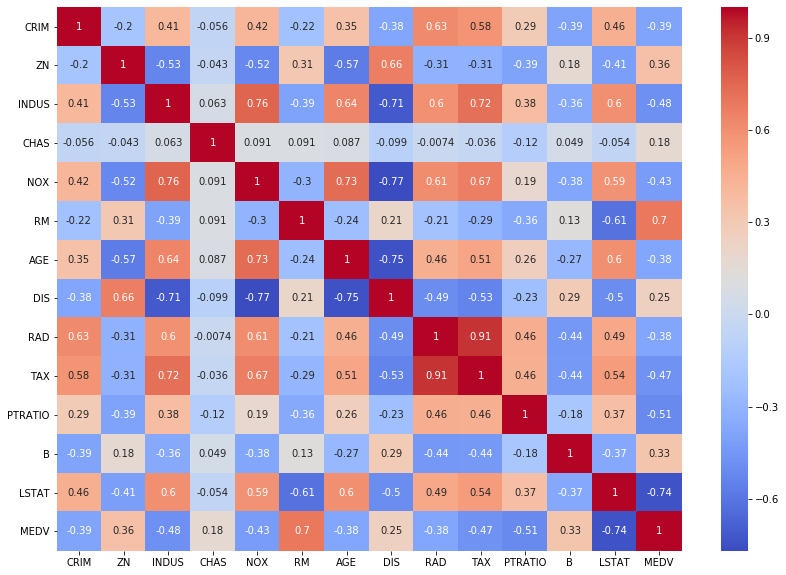

In [16]:
plt.figure(figsize=(14,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

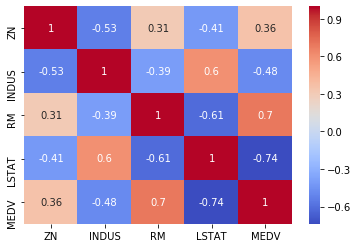

In [17]:
sns.heatmap(df[col_study + ['MEDV']].corr(), annot=True, cmap='coolwarm')
plt.show()

<div id="filtered_correlation">
    <h1>Filtered Correlation Matrix</h1>
</div>

In [18]:
corr_matrix = df.corr()

In [19]:
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


In [20]:
corr_matrix[np.abs(corr_matrix) < 0.4] = 0

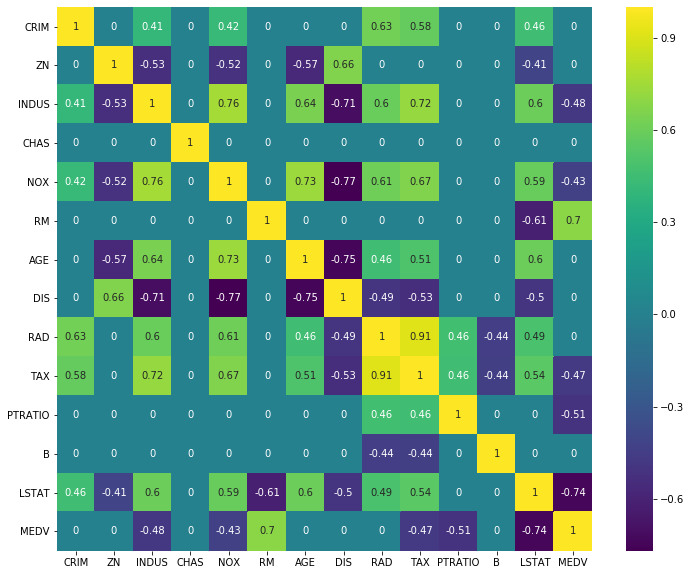

In [21]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='viridis')
plt.show()

## Sort features by correlation

In [22]:
df_corr = df.corr()
df_corr

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000,-0.200,0.407,-0.056,0.421,-0.219,0.353,-0.380,0.626,0.583,0.290,-0.385,0.456,-0.388
ZN,-0.200,1.000,-0.534,-0.043,-0.517,0.312,-0.570,0.664,-0.312,-0.315,-0.392,0.176,-0.413,0.360
INDUS,0.407,-0.534,1.000,0.063,0.764,-0.392,0.645,-0.708,0.595,0.721,0.383,-0.357,0.604,-0.484
CHAS,-0.056,-0.043,0.063,1.000,0.091,0.091,0.087,-0.099,-0.007,-0.036,-0.122,0.049,-0.054,0.175
NOX,0.421,-0.517,0.764,0.091,1.000,-0.302,0.731,-0.769,0.611,0.668,0.189,-0.380,0.591,-0.427
RM,-0.219,0.312,-0.392,0.091,-0.302,1.000,-0.240,0.205,-0.210,-0.292,-0.356,0.128,-0.614,0.695
AGE,0.353,-0.570,0.645,0.087,0.731,-0.240,1.000,-0.748,0.456,0.506,0.262,-0.274,0.602,-0.377
DIS,-0.380,0.664,-0.708,-0.099,-0.769,0.205,-0.748,1.000,-0.495,-0.534,-0.232,0.292,-0.497,0.250
RAD,0.626,-0.312,0.595,-0.007,0.611,-0.210,0.456,-0.495,1.000,0.910,0.465,-0.444,0.489,-0.382
TAX,0.583,-0.315,0.721,-0.036,0.668,-0.292,0.506,-0.534,0.910,1.000,0.461,-0.442,0.544,-0.469


In [23]:
df_corr['MEDVabs'] = df_corr['MEDV'].apply(np.abs)
df_corr.sort_values(by='MEDVabs', inplace=True, ascending=False)
print('Correlation between features and MEDV: ')
print(df_corr['MEDV'])

Correlation between features and MEDV: 
MEDV       1.000
LSTAT     -0.738
RM         0.695
PTRATIO   -0.508
INDUS     -0.484
TAX       -0.469
NOX       -0.427
CRIM      -0.388
RAD       -0.382
AGE       -0.377
ZN         0.360
B          0.333
DIS        0.250
CHAS       0.175
Name: MEDV, dtype: float64


<div id="simple_linear_regression">
    <h1>Simple Linear Regression</h1>
</div>

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lr_model = LinearRegression()

In [26]:
X = df['LSTAT'].values
y = df['MEDV'].values

In [27]:
print(X.shape, y.shape)

(506,) (506,)


In [28]:
X = X.reshape(-1,1)

In [29]:
print(X.shape, y.shape)

(506, 1) (506,)


In [30]:
lr_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
print(lr_model.coef_, lr_model.intercept_)

[-0.95004935] 34.5538408793831


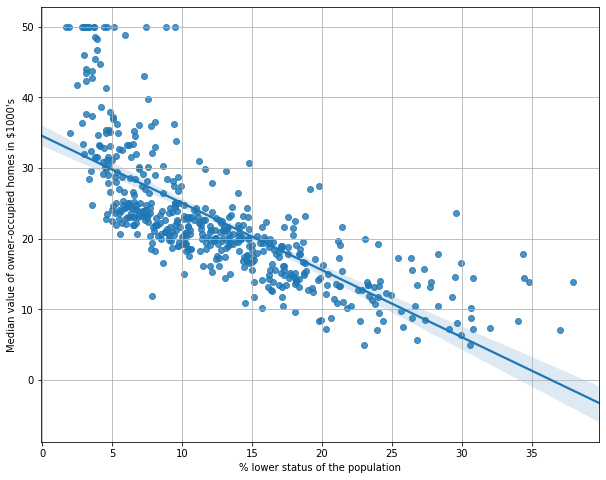

In [32]:
plt.figure(figsize=(10,8))
sns.regplot(X,y)
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.grid()
plt.show()

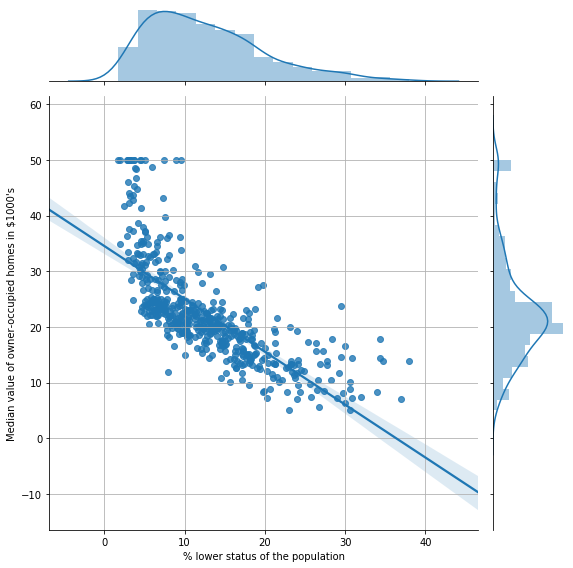

In [33]:
sns.jointplot(data=df, x='LSTAT', y='MEDV', height=8, kind='reg')
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.grid()
plt.show()

In [34]:
LSTAT_value_list = [[0],[10],[20],[30]]
predictions = lr_model.predict(LSTAT_value_list)

In [35]:
for i, LSTAT_value in enumerate(LSTAT_value_list):
    print('Prediction based on LSTAT = {0:<2}: {1:>6.2f}'.format(LSTAT_value[0], predictions[i]))

Prediction based on LSTAT = 0 :  34.55
Prediction based on LSTAT = 10:  25.05
Prediction based on LSTAT = 20:  15.55
Prediction based on LSTAT = 30:   6.05


<div id="ransac">
    <h1>RANdom SAmple Consensus (RANSAC)</h1>
</div>

Robust Regression

In [36]:
from sklearn.linear_model import RANSACRegressor

In [37]:
ransac = RANSACRegressor()

In [38]:
ransac.fit(X, y)

RANSACRegressor(base_estimator=None, is_data_valid=None, is_model_valid=None,
                loss='absolute_loss', max_skips=inf, max_trials=100,
                min_samples=None, random_state=None, residual_threshold=None,
                stop_n_inliers=inf, stop_probability=0.99, stop_score=inf)

In [39]:
inliers = ransac.inlier_mask_
outliers = np.logical_not(inliers)

In [40]:
X_values = np.linspace(0,40,20).reshape(-1,1)
y_values_ransac = ransac.predict(X_values)

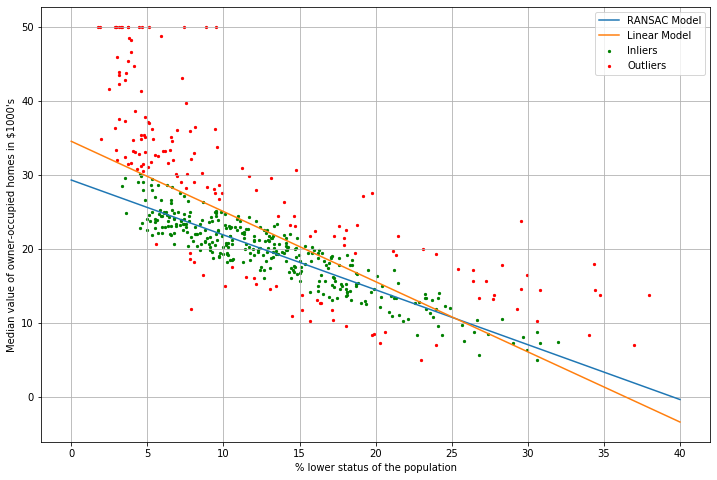

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(X[inliers], y[inliers], s=5, c='g', label='Inliers')
plt.scatter(X[outliers], y[outliers], s=5, c='r', label='Outliers')
plt.plot(X_values, y_values_ransac, label="RANSAC Model")
plt.plot(X_values, lr_model.predict(X_values), label="Linear Model")
plt.xlabel('% lower status of the population')
plt.ylabel('Median value of owner-occupied homes in $1000\'s')
plt.legend()
plt.grid()
plt.show()

RANSAC looks actually worse than the linear model. For this data a simple linear model does not really fit the curve of the data.

<div id="evaluation">
    <h1 >Evaluate the accuracy of a Regression Model</h1>
    
Simple train/test split of the dataset.
</div>

In [42]:
from sklearn.model_selection import train_test_split 

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [44]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(354, 1)
(152, 1)
(354,)
(152,)


In [45]:
lr_model = LinearRegression()

In [46]:
lr_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [47]:
train_pred = lr_model.predict(X_train)
test_pred = lr_model.predict(X_test)

## Mean Absolute Error (MAE)

In [48]:
from sklearn.metrics import mean_absolute_error

In [49]:
print("mean absolute error on training data: {:.3f}".format(mean_absolute_error(X_train, train_pred)))
print("mean absolute error on test data:     {:.3f}".format(mean_absolute_error(X_test, test_pred)))

mean absolute error on training data: 15.302
mean absolute error on test data:     14.346


## Mean Squared Error (MSE)

In [50]:
from sklearn.metrics import mean_squared_error

In [51]:
print("mean squared error on training data: {:.3f}".format(mean_squared_error(X_train, train_pred)))
print("mean squared error on test data:     {:.3f}".format(mean_squared_error(X_test, test_pred)))

mean squared error on training data: 311.247
mean squared error on test data:     285.376


## Root Mean Squared Error (RMSE)

In [52]:
print("root mean squared error on training data: {:.3f}".format(np.sqrt(mean_squared_error(X_train, train_pred))))
print("root mean squared error on test data:     {:.3f}".format(np.sqrt(mean_squared_error(X_test, test_pred))))

root mean squared error on training data: 17.642
root mean squared error on test data:     16.893


## Coefficient of determination ($R^2$)

$\displaystyle R^2 = 1 - \frac{SSR}{SST}$

SSR - sum of squared errors to the regression line<br>
SST - sum of squared errors to the total mean of the values

In [53]:
from sklearn.metrics import r2_score

In [54]:
print("R^2 on training data: {:.3f}".format(r2_score(X_train, train_pred)))
print("R^2 on test data:     {:.3f}".format(r2_score(X_test, test_pred)))

R^2 on training data: -5.170
R^2 on test data:     -4.538
